<a href="https://colab.research.google.com/github/krishnasd1007/NSAC-Storytellers/blob/main/2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
path = '/gdrive/My Drive/spaceapps/'

##**DATA PROCESSING**

In [ ]:
data = pd.read_csv(path + '2018.csv')
data.head()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,SLP,SLP_ATTRIBUTES,STP,STP_ATTRIBUTES,VISIB,VISIB_ATTRIBUTES,WDSP,WDSP_ATTRIBUTES,MXSPD,GUST,MAX,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
0,43295099999,2018-01-01,12.966667,77.583333,921.0,"BANGALORE, IN",71.9,8,54.0,8,9999.9,0,908.0,8,4.8,8,0.5,8,2.9,999.9,83.1,,61.9,,0.0,I,999.9,0
1,43295099999,2018-01-02,12.966667,77.583333,921.0,"BANGALORE, IN",71.7,7,56.2,7,9999.9,0,907.9,7,3.2,7,0.6,7,999.9,999.9,84.0,,64.0,,0.0,I,999.9,0
2,43295099999,2018-01-03,12.966667,77.583333,921.0,"BANGALORE, IN",72.0,8,58.3,8,9999.9,0,909.7,8,3.7,8,2.1,8,2.9,999.9,84.2,,65.1,,0.0,I,999.9,0
3,43295099999,2018-01-04,12.966667,77.583333,921.0,"BANGALORE, IN",70.8,8,56.8,8,9999.9,0,910.2,8,3.9,8,2.7,8,4.1,999.9,81.7,,62.6,,0.0,I,999.9,0
4,43295099999,2018-01-05,12.966667,77.583333,921.0,"BANGALORE, IN",69.2,8,52.2,8,9999.9,0,909.1,8,3.9,8,2.6,8,4.1,999.9,82.9,,59.9,,0.0,I,999.9,0


In [ ]:
data.columns

Index(['STATION', 'DATE', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'NAME', 'TEMP',
       'TEMP_ATTRIBUTES', 'DEWP', 'DEWP_ATTRIBUTES', 'SLP', 'SLP_ATTRIBUTES',
       'STP', 'STP_ATTRIBUTES', 'VISIB', 'VISIB_ATTRIBUTES', 'WDSP',
       'WDSP_ATTRIBUTES', 'MXSPD', 'GUST', 'MAX', 'MAX_ATTRIBUTES', 'MIN',
       'MIN_ATTRIBUTES', 'PRCP', 'PRCP_ATTRIBUTES', 'SNDP', 'FRSHTT'],
      dtype='object')

In [ ]:
data = data.drop(columns=['STATION','NAME','TEMP_ATTRIBUTES','SLP_ATTRIBUTES','STP_ATTRIBUTES','VISIB_ATTRIBUTES','WDSP_ATTRIBUTES','DEWP_ATTRIBUTES','MAX_ATTRIBUTES','MIN_ATTRIBUTES','PRCP_ATTRIBUTES'])

In [ ]:
data.head(10)

,DATE,LATITUDE,LONGITUDE,ELEVATION,TEMP,DEWP,SLP,STP,VISIB,WDSP,MXSPD,GUST,MAX,MIN,PRCP,SNDP,FRSHTT
0,2018-01-01,12.966667,77.583333,921.0,71.9,54.0,9999.9,908.0,4.8,0.5,2.9,999.9,83.1,61.9,0.0,999.9,0
1,2018-01-02,12.966667,77.583333,921.0,71.7,56.2,9999.9,907.9,3.2,0.6,999.9,999.9,84.0,64.0,0.0,999.9,0
2,2018-01-03,12.966667,77.583333,921.0,72.0,58.3,9999.9,909.7,3.7,2.1,2.9,999.9,84.2,65.1,0.0,999.9,0
3,2018-01-04,12.966667,77.583333,921.0,70.8,56.8,9999.9,910.2,3.9,2.7,4.1,999.9,81.7,62.6,0.0,999.9,0
4,2018-01-05,12.966667,77.583333,921.0,69.2,52.2,9999.9,909.1,3.9,2.6,4.1,999.9,82.9,59.9,0.0,999.9,0
5,2018-01-06,12.966667,77.583333,921.0,68.3,50.1,9999.9,908.8,3.6,1.5,2.9,999.9,81.0,58.5,0.0,999.9,0
6,2018-01-07,12.966667,77.583333,921.0,68.7,50.1,9999.9,909.6,3.9,2.2,4.1,999.9,81.0,59.4,0.0,999.9,0
7,2018-01-08,12.966667,77.583333,921.0,68.2,48.9,9999.9,910.4,4.3,3.5,4.1,999.9,81.0,58.6,0.0,999.9,0
8,2018-01-09,12.966667,77.583333,921.0,70.2,55.4,9999.9,911.6,3.9,3.6,5.1,999.9,79.9,59.9,0.0,999.9,0
9,2018-01-10,12.966667,77.583333,921.0,71.2,59.1,9999.9,912.5,3.6,3.1,6.0,999.9,80.8,64.8,0.0,999.9,0


In [ ]:
data.isnull()

,DATE,LATITUDE,LONGITUDE,ELEVATION,TEMP,DEWP,SLP,STP,VISIB,WDSP,MXSPD,GUST,MAX,MIN,PRCP,SNDP,FRSHTT
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
353,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
354,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
355,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


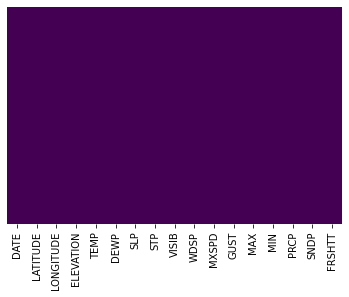

In [ ]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
data['MONTH'] = pd.to_datetime(data.DATE, format='%Y/%m/%d').dt.month_name()

In [ ]:
data.head()

,DATE,LATITUDE,LONGITUDE,ELEVATION,TEMP,DEWP,SLP,STP,VISIB,WDSP,MXSPD,GUST,MAX,MIN,PRCP,SNDP,FRSHTT,MONTH
0,2018-01-01,12.966667,77.583333,921.0,71.9,54.0,9999.9,908.0,4.8,0.5,2.9,999.9,83.1,61.9,0.0,999.9,0,January
1,2018-01-02,12.966667,77.583333,921.0,71.7,56.2,9999.9,907.9,3.2,0.6,999.9,999.9,84.0,64.0,0.0,999.9,0,January
2,2018-01-03,12.966667,77.583333,921.0,72.0,58.3,9999.9,909.7,3.7,2.1,2.9,999.9,84.2,65.1,0.0,999.9,0,January
3,2018-01-04,12.966667,77.583333,921.0,70.8,56.8,9999.9,910.2,3.9,2.7,4.1,999.9,81.7,62.6,0.0,999.9,0,January
4,2018-01-05,12.966667,77.583333,921.0,69.2,52.2,9999.9,909.1,3.9,2.6,4.1,999.9,82.9,59.9,0.0,999.9,0,January


In [ ]:
data = data.drop(columns='DATE')
data.head()

,LATITUDE,LONGITUDE,ELEVATION,TEMP,DEWP,SLP,STP,VISIB,WDSP,MXSPD,GUST,MAX,MIN,PRCP,SNDP,FRSHTT,MONTH
0,12.966667,77.583333,921.0,71.9,54.0,9999.9,908.0,4.8,0.5,2.9,999.9,83.1,61.9,0.0,999.9,0,January
1,12.966667,77.583333,921.0,71.7,56.2,9999.9,907.9,3.2,0.6,999.9,999.9,84.0,64.0,0.0,999.9,0,January
2,12.966667,77.583333,921.0,72.0,58.3,9999.9,909.7,3.7,2.1,2.9,999.9,84.2,65.1,0.0,999.9,0,January
3,12.966667,77.583333,921.0,70.8,56.8,9999.9,910.2,3.9,2.7,4.1,999.9,81.7,62.6,0.0,999.9,0,January
4,12.966667,77.583333,921.0,69.2,52.2,9999.9,909.1,3.9,2.6,4.1,999.9,82.9,59.9,0.0,999.9,0,January


In [ ]:
mnth_list = data['MONTH'].tolist() 
print(mnth_list)

['January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'February', 'February', 'February', 'February', 'February', 'February', 'February', 'February', 'February', 'February', 'February', 'February', 'February', 'February', 'February', 'February', 'February', 'February', 'February', 'February', 'February', 'February', 'February', 'February', 'February', 'February', 'February', 'February', 'March', 'March', 'March', 'March', 'March', 'March', 'March', 'March', 'March', 'March', 'March', 'March', 'March', 'March', 'March', 'March', 'March', 'March', 'March', 'March', 'March', 'March', 'March', 'March', 'March', 'March', 'March', 'March', 'March', 'March', 'March', 'April', 'April', 'April', 'April', 'April'

In [ ]:
months = {'MONTH': {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}}


In [ ]:
data.replace(months, inplace=True)
data.head()

,LATITUDE,LONGITUDE,ELEVATION,TEMP,DEWP,SLP,STP,VISIB,WDSP,MXSPD,GUST,MAX,MIN,PRCP,SNDP,FRSHTT,MONTH
0,12.966667,77.583333,921.0,71.9,54.0,9999.9,908.0,4.8,0.5,2.9,999.9,83.1,61.9,0.0,999.9,0,1
1,12.966667,77.583333,921.0,71.7,56.2,9999.9,907.9,3.2,0.6,999.9,999.9,84.0,64.0,0.0,999.9,0,1
2,12.966667,77.583333,921.0,72.0,58.3,9999.9,909.7,3.7,2.1,2.9,999.9,84.2,65.1,0.0,999.9,0,1
3,12.966667,77.583333,921.0,70.8,56.8,9999.9,910.2,3.9,2.7,4.1,999.9,81.7,62.6,0.0,999.9,0,1
4,12.966667,77.583333,921.0,69.2,52.2,9999.9,909.1,3.9,2.6,4.1,999.9,82.9,59.9,0.0,999.9,0,1


##**PLOTS**

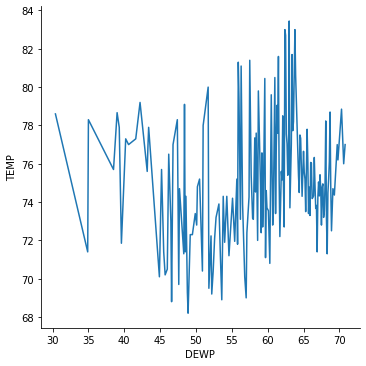

In [ ]:
sns.relplot(x="DEWP", y="TEMP", ci=None, kind="line", data=data)

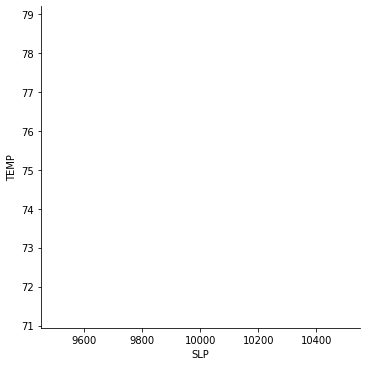

In [ ]:
sns.relplot(x="SLP", y="TEMP", ci=None, kind="line", data=data)

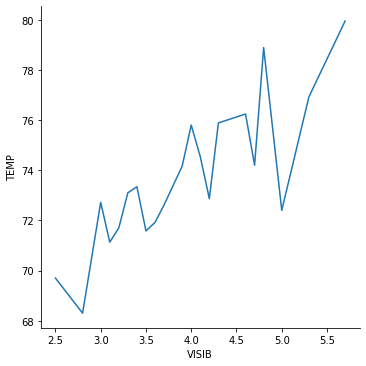

In [ ]:
sns.relplot(x="VISIB", y="TEMP", ci=None, kind="line", data=data)

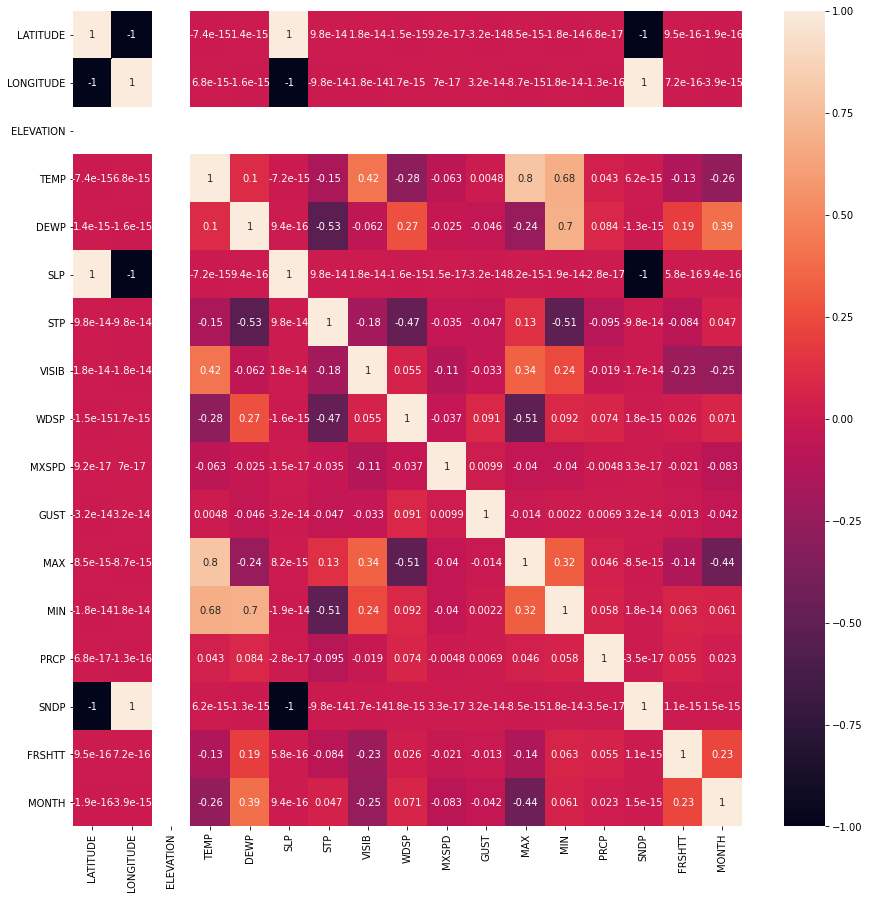

In [ ]:
corrs=data.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corrs, annot=True)
plt.show()

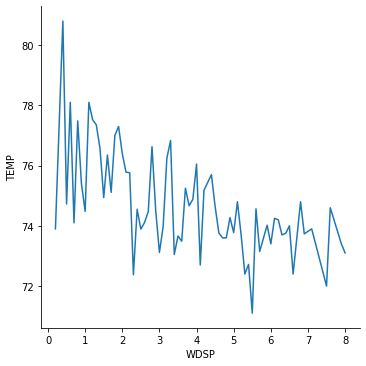

In [ ]:
sns.relplot(x="WDSP", y="TEMP", ci=None, kind="line", data=data)

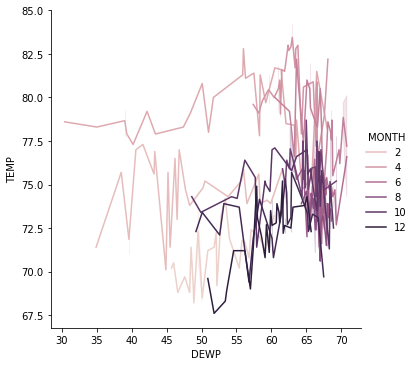

In [ ]:
sns.relplot(x="DEWP", y="TEMP", hue="MONTH",kind="line", data=data)

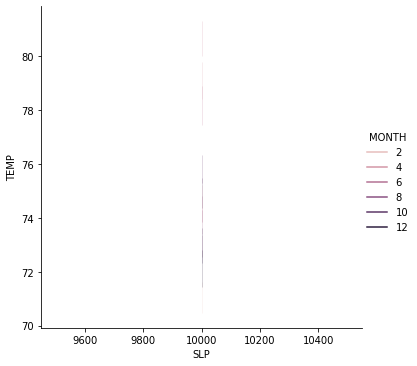

In [ ]:
sns.relplot(x="SLP", y="TEMP", hue="MONTH",kind="line", data=data)

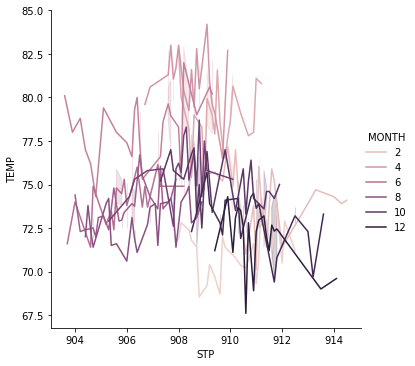

In [ ]:
sns.relplot(x="STP", y="TEMP", hue="MONTH",kind="line", data=data)

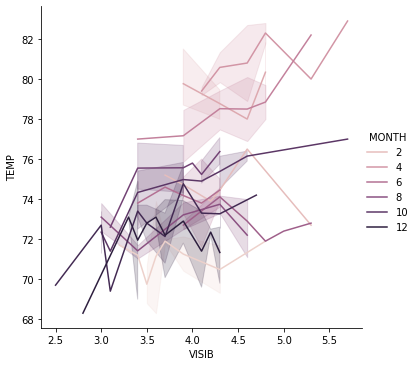

In [ ]:
sns.relplot(x="VISIB", y="TEMP", hue="MONTH",kind="line", data=data)

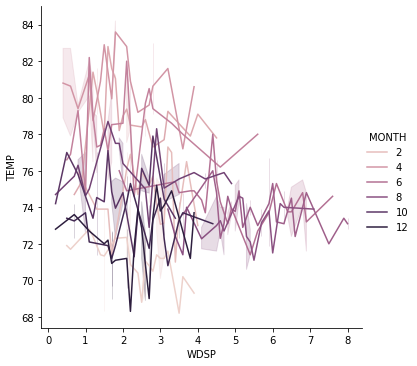

In [ ]:
sns.relplot(x="WDSP", y="TEMP", hue="MONTH",kind="line", data=data)

##**ML MODEL**

In [ ]:
data = (data-data.mean())/(data.max()-data.min())
data.head()

,LATITUDE,LONGITUDE,ELEVATION,TEMP,DEWP,SLP,STP,VISIB,WDSP,MXSPD,GUST,MAX,MIN,PRCP,SNDP,FRSHTT,MONTH
0,inf,-inf,NaN,-0.191016,-0.174501,inf,-0.061239,0.212885,-0.316598,-0.005313,0.008397,-0.145776,-0.273780,-0.017867,-inf,-0.049062,-0.49427
1,inf,-inf,NaN,-0.203064,-0.120046,inf,-0.070413,-0.287115,-0.303778,0.993685,0.008397,-0.098655,-0.164405,-0.017867,-inf,-0.049062,-0.49427
2,inf,-inf,NaN,-0.184992,-0.068066,inf,0.094724,-0.130865,-0.111470,-0.005313,0.008397,-0.088184,-0.107114,-0.017867,-inf,-0.049062,-0.49427
3,inf,-inf,NaN,-0.257281,-0.105195,inf,0.140596,-0.068365,-0.034547,-0.004110,0.008397,-0.219074,-0.237322,-0.017867,-inf,-0.049062,-0.49427
4,inf,-inf,NaN,-0.353667,-0.219056,inf,0.039678,-0.068365,-0.047368,-0.004110,0.008397,-0.156247,-0.377947,-0.017867,-inf,-0.049062,-0.49427


In [ ]:
x = data.drop(columns=['TEMP','LATITUDE','LONGITUDE','ELEVATION','SLP','SNDP'])
y = data['TEMP']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 2)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x_train,y_train)

In [ ]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

score = model.score(x_train,y_train)
print('train model score : {} %'.format(score*100))

score = model.score(x_test,y_test)
print('test model score : {} %'.format(score*100))

train model score : 85.4084179370534 %
test model score : 89.07759076322114 %


In [ ]:
from sklearn.metrics import mean_absolute_error

train_error = mean_absolute_error(y_train, train_pred)
train_accuracy = 1 - train_error
print('accuracy on train data : {} %'.format(train_accuracy*100))

test_error = mean_absolute_error(y_test,test_pred)
test_accuracy = 1 - test_error
print('accuracy on test data : {} %'.format(test_accuracy*100))

accuracy on train data : 93.9485512537685 %
accuracy on test data : 94.76598342307048 %


In [ ]:
y.mean()

-1.3143858861563654e-15

##**2019 PREDICTION**

In [ ]:
datat = pd.read_csv(path + '2019.csv')

In [ ]:
datat = datat.drop(columns=['STATION','NAME','TEMP_ATTRIBUTES','SLP_ATTRIBUTES','STP_ATTRIBUTES','VISIB_ATTRIBUTES','WDSP_ATTRIBUTES','DEWP_ATTRIBUTES','MAX_ATTRIBUTES','MIN_ATTRIBUTES','PRCP_ATTRIBUTES'])

In [ ]:
datat['MONTH'] = pd.to_datetime(datat.DATE, format='%Y/%m/%d').dt.month_name()

In [ ]:
datat = datat.drop(columns='DATE')

In [ ]:
monthst = {'MONTH': {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}}

In [ ]:
datat.replace(monthst, inplace=True)

In [ ]:
datat = (datat-datat.mean())/(datat.max()-datat.min())

In [ ]:
x = datat.drop(columns=['TEMP','LATITUDE','LONGITUDE','ELEVATION','SLP','SNDP'])

In [ ]:
datat_pred = model.predict(x)
print(datat_pred)

[-0.2780161  -0.3627064  -0.3313815  -0.35479383 -0.3593421  -0.38132457
 -0.29717143 -0.20253825 -0.27101545 -0.22647762 -0.27425197 -0.22359663
 -0.29045963 -0.24708859 -0.29046115 -0.23007414 -0.16834514 -0.19326375
 -0.23627729 -0.22711145 -0.22968864 -0.35660411 -0.19876523 -0.12835807
 -0.13969054 -0.10609021 -0.0911622  -0.10832346 -0.16100348 -0.19635856
 -0.19176569 -0.25604272 -0.2647415  -0.18736629 -0.17291867 -0.07602943
 -0.10082587 -0.04689738  0.05874052  0.02633443 -0.08619687 -0.06114816
 -0.20258209 -0.14535824 -0.10029578 -0.03134436  0.06690737  0.19151949
  0.05358946  0.18455655  0.10607232 -0.00280909  0.04017521 -0.01567337
  0.06220637  0.12925259  0.19969386  0.20863324  0.19879767  0.11439768
  0.16381755  0.05591212  0.11518091  0.25978751  0.35718925  0.3479242
  0.39637573  0.29292672  0.25919047  0.32613179  0.29030363  0.20098868
  0.21905819  0.26377727  0.18620866  0.12317279  0.19240893  0.20747988
  0.32699973  0.32061416  0.27211651  0.29829589  0.

In [ ]:
path = '/gdrive/My Drive/spaceapps/'
np.savetxt(path + "/2019_pred.csv",datat_pred, delimiter=",")

In [ ]:
datat_pred.mean()

-0.0030724326656995163